In [4]:
import numpy as np

# Relatório Calculo Numérico




### Alunos: 
Matheus Steigenberg Populim 10737410<br>
Bruno Gazoni<br>
Bruno Carlotto Baldissera<br>

# 1 - Solução de Sistemas Lineares: métodos diretos e métodos iterativos (Comparação do desempenho dos métodos para matrizes de dimensão arbitrariamente grandes)


In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

# 1 Sistemas Lineares com Matrizes Simétricas

## 1 Dados a matriz A e o vetor b a seguir

In [3]:
def create_simmetric_system(n):
    A = np.zeros((n,n))
    b = np.zeros(n)
    for i in range(n):
        b[i] = 1/n**4
    for i in range(0,n):
        A[i,i] = 6 #diagonal principal
    for i in range(0,n-1):
        A[i,i+1] = -4 #diagonal acima da principal
        A[i+1,i] = -4 #diagonal abaixo da principal
    for i in range(0,n-2):
        A[i,i+2] = 1
        A[i+2,i] = 1 #diagonais mais distantes  
    return A,b

In [3]:
n = 100
A,b = create_simmetric_system(n)

### Agora é só inserir os números que não se repetem ao longo das diagonais:

In [ ]:
A[0,0] = 9
A[-1,-1] = 1
A[-2,-2] = 5
A[-1,-2] = -2
A[-2,-1] = -2

In [ ]:
A

In [ ]:
def cholesky(A):
    """Performs a Cholesky decomposition of A, which must 
    be a symmetric and positive definite matrix. The function
    returns the lower variant triangular matrix, L."""
    n = A.shape[0]
    # Create zero matrix for L
    L = np.zeros((n,n))

    # Perform the Cholesky decomposition
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k):
                L[i][k] = np.sqrt(A[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return L

In [ ]:
def solve_triangular_system(L,b):
    n = L.shape[0]
    x = np.zeros((n))
    for i in range(n):
        soma = 0
        for j in range(0,i):
            soma += L[i,j]*x[j]
        x[i] = (b[i] - soma)/L[i,i]
    return x

In [ ]:
def solve_triangular_system_backwards(L,b):
    n = L.shape[0]
    x = np.zeros((n))
    for i in range(n-1,0-1,-1):
        soma = 0
        for j in range(n-1,i,-1):
            soma += L[i,j]*x[j]
        x[i] = (b[i] - soma)/L[i,i]
    return x

In [ ]:
def solve_cholesky_system(A,b):
    L = cholesky(A)
    y = solve_triangular_system(L,b)
    x = solve_triangular_system_backwards(np.transpose(L),y)
    return x    

In [ ]:
A,b = create_simmetric_system(10)
x = solve_cholesky_system(A,b)
print(x)

In [ ]:
x_test = np.linalg.solve(A,b)
print(x_test)

In [ ]:
L = cholesky(A)

### -------------------------------------------------------------------------------------------------------------------------------------

## 2

In [ ]:
def seidel(a,b,t=5000,x=None): 
    if x is None:
        x = np.zeros(len(A[0]))      
    n = len(a)                   
    # for loop for 3 times as to calculate x, y , z
    for iterations in range(t):
        for j in range(0, n):         
            d = b[j]                   
            for i in range(0, n):      
                if(j != i): 
                    d-=a[j][i] * x[i]        
            x[j] = d / a[j][j]            
    return x

In [ ]:
solution_seidel = seidel(A,b)

In [ ]:
solution = np.linalg.solve(A,b)

In [ ]:
print(np.round(solution-solution_seidel,decimals=0))

In [ ]:
def jacobi(A,b,N=25,x=None):
    """Solves the equation Ax=b via the Jacobi iterative method."""
    # Create an initial guess if needed                                                                                                                                                            
    if x is None:
        x = zeros(len(A[0]))
    # Create a vector of the diagonal elements of A                                                                                                                                                
    # and subtract them from A                                                                                                                                                                     
    D = np.diag(A)
    R = A - np.diagflat(D)

    # Iterate for N times                                                                                                                                                                          
    for i in range(N):
        x = (b - np.dot(R,x)) / D
    return x

In [ ]:
initial2 = np.zeros(n)
solution_jacobi = jacobi(A,b,N=25,x=initial2)

In [ ]:
print(solution_jacobi)

In [ ]:
print(np.round(solution-solution_jacobi,decimals=0))

## 3

In [ ]:
n_iterations = list()
time_elapsed = list()
for n in range(10,200,20):
    A,b = create_simmetric_system(n)
    start = time.time()
    solution = solve_cholesky_system(A,b)
    end = time.time()
    n_iterations.append(n)
    time_elapsed.append(end-start)

In [ ]:
pol = np.polyfit(n_iterations,time_elapsed,deg=3)
y_pol = np.polyval(pol,n_iterations)


plt.rcParams['figure.figsize'] = (16,10)

#plotting the fitted function of degree 3
plt.plot(n_iterations,y_pol,color='b')

#plotting the time elapsed
plt.plot(n_iterations,time_elapsed)
plt.show()

# ------------------------------------------------------------------------------------------------------

# 2 Decomposição Em Valores Singulares (Singular Value Decomposition SVD)

## Método de Francis

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def francis(A,tol):
    n = A.shape[0]
    V = np.identity(n)
    error = np.inf
    
    while(error>tol):
        Q,R = np.linalg.qr(A)
        A = np.dot(R,Q)
        V = np.dot(V,Q)
        error = np.linalg.norm(A-np.diag(np.diag(A)))
        
    D = np.diag(A)
    
    return V,D

In [17]:
def SVD(A):
    tol = 0.00001
    m,n = A.shape
    k = min(m,n)
    S = np.zeros((m,n))
    
    U, y = francis(np.dot(A,np.transpose(A)),tol)
    V,D = francis(np.dot(np.transpose(A),A),tol)
    S[0:k,0:k] = np.diag(np.sqrt(D))
    
    return U,S,V

In [21]:
A,b = create_simmetric_system(100)

In [23]:
U,S,V = SVD(A)
#U = np.round(U,decimals=3) 
#S = np.round(S,decimals=3)
#V = np.round(V,decimals=3)

# --------------------------------------------------------------------------------------------------

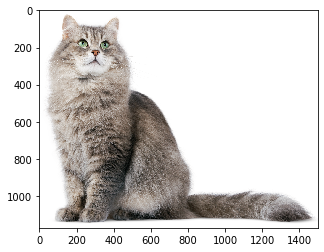

In [6]:
imagem = plt.imread('gato.png')
plt.imshow(imagem)

In [7]:
print(imagem.shape)

(1172, 1500, 4)


In [157]:
for i in range(imagem.shape[0]):
    for j in range(imagem.shape[1]):
        pixel = imagem[i,j]
        r = pixel[0]
        g = pixel[1]
        b = pixel[2]
        alpha = pixel[3] #transparencia
        
        r = (r *.299)
        g = (g *.587)
        b = (b *.114)
        
        v = (r+g+b)
        if(alpha==0):
            v = 1
        
        pixel = [v,v,v,1]
        
        imagem[i,j] = pixel
        

In [158]:
plt.rcParams['figure.figsize'] = (16,10)

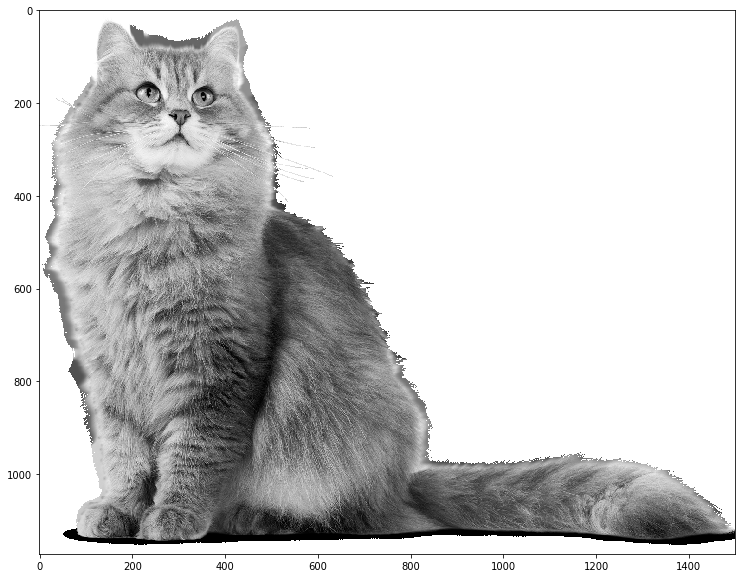

In [159]:
plt.imshow(imagem)

In [160]:
print(imagem[1130,800])

[0. 0. 0. 1.]


In [161]:
A = np.zeros((imagem.shape[0],imagem.shape[1]))
A[:,:] = imagem[:,:,0]

k = min(A.shape[0],A.shape[1])

In [187]:
U, S, V = np.linalg.svd(A)
k = 15

In [188]:
A_k = np.dot(U[:,:k],np.dot(np.diag(S)[:k,:k],V[:k,:]))

In [189]:
A_k.shape

(1172, 1500)

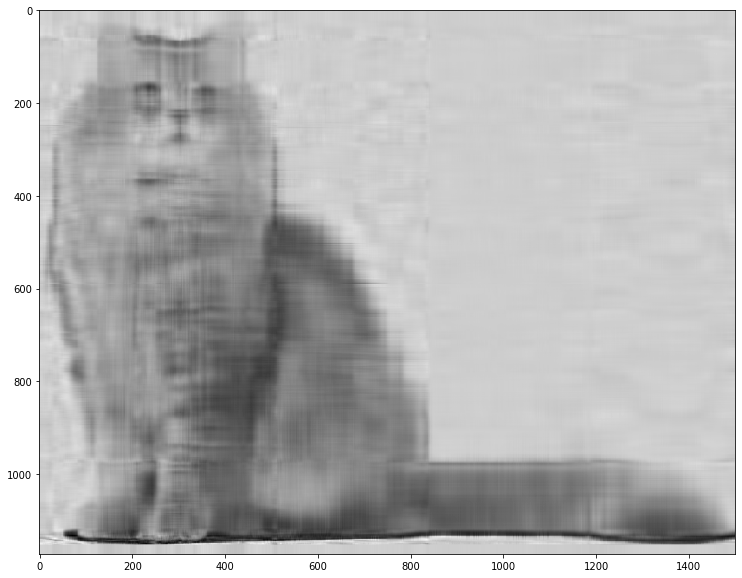

In [190]:
plt.imshow(A_k,cmap='gray')

# Exercício 3

### Primeiramente, decompondo a matriz em LU

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [17]:
A = np.array([[1,4,3],[9,8,7],[2,5,2]])

In [27]:
def fatoraLU(A):
    n = np.shape(A)[0]
    L = np.eye(n) 
    U = np.zeros((n,n))
    for k in range(n):
        for j in range(k,n):
            soma = 0
            for s in range(k):
                soma += L[k,s]*U[s,j]
            U[k,j] = A[k,j] - soma
        for i in range(k+1,n):
            L[i,k]=A[i,k]
            for s in range(k):
                L[i,k]=L[i,k]-L[i,s]*U[s,k]
            L[i,k]=L[i,k]/U[k,k]
    return L, U   

In [28]:
L,U = fatoraLU(A)

In [31]:
print(L)
print(U)
print(L.dot(U))

[[1.         0.         0.        ]
 [9.         1.         0.        ]
 [2.         0.10714286 1.        ]] 
 [[  1.           4.           3.        ]
 [  0.         -28.         -20.        ]
 [  0.           0.          -1.85714286]] 
 [[1. 4. 3.]
 [9. 8. 7.]
 [2. 5. 2.]]


# 2 - Métodos de Autovalores e Autovetores (Decomposição SVD e compressão de imagem, Google pagerank)


# 3 - Solução de Equações e Sistemas Não-Lineares (Aplicações do método de Newton para sistemas)

# 4 - Método dos Mínimos Quadrados (Análise de dados reais como por exemplo dados relativos ao número de mortos/casos pela Covid-19 por dia em diversos paises)

# 5 - Interpolação Polinomial (Splines)

# 6 - Integração Numérica (Cálculo de integrais que não possuem solução analitica)

# 7 - Integração Numérica (Cálculo de integrais que não possuem solução analítica)